In [1]:
import tensorflow
import keras
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


# Define model

In [2]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D

def text_detection_model(channels=8):
    """ Defines a simple CNN that inputs an image and outputs a binary mask. """

    input_shape = (1, None, None)
    activation = 'relu'

    model = Sequential()
    model.add(Convolution2D(channels, 5, 5, border_mode='same', input_shape=input_shape))
    model.add(Activation(activation))
    model.add(Convolution2D(channels, 5, 5, border_mode='same'))
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(channels, 5, 5, border_mode='same'))
    model.add(Activation(activation))
    model.add(Convolution2D(channels * 2, 5, 5, border_mode='same'))
    model.add(Activation(activation))
    model.add(Convolution2D(channels * 2, 5, 5, border_mode='same'))
    model.add(Activation(activation))
    model.add(Convolution2D(256, 1, 1, border_mode='same'))
    model.add(Activation(activation))
    model.add(Convolution2D(1, 1, 1, border_mode='same'))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam')

    return model


# Generate some data

In [4]:
from data_generator import StringGenerator, StringImageBatchGenerator, StringRenderer

string_generator = StringGenerator()
string_renderer = StringRenderer(image_size=(160, 160),
                                 target_size=(80, 80),
                                 fonts_folder='fonts',
                                 backgrounds_folder='backgrounds')
data_generator = StringImageBatchGenerator(string_generator=string_generator, 
                                           string_renderer=string_renderer)


In [7]:
images, targets = data_generator.get_batch(32)

# Visualized data

(160, 160)


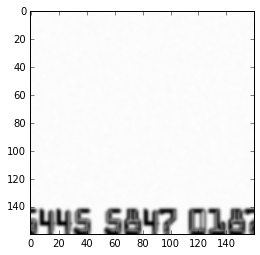

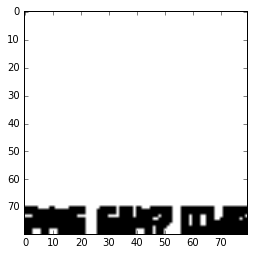

In [6]:
def view_image(i):
    image = images[i][0]
    print(image.shape)
    target = targets[i][0]
    plt.figure()
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='bilinear')
    plt.figure()
    plt.imshow(target, cmap=plt.cm.gray_r, interpolation='bilinear')
    
q = interact(view_image, i=(0, len(images) - 1))

# Create model and train it

In [12]:
from keras.callbacks import ModelCheckpoint

samples_per_epoch = 256
validation_image = 256
num_epochs = 20
model_channels = 16

print("Building model")
model = text_detection_model(model_channels)

print("Generating validation set")
val_data = data_generator.get_batch(256)

check_point_callback = ModelCheckpoint('best_model.h5',
                                       monitor='val_loss',
                                       verbose=1, save_best_only=True, mode='auto')

Building model
Generating validation set
Starting training


In [ ]:
print("Starting training")
model.fit_generator(generator=data_generator.generate(),
                    samples_per_epoch=samples_per_epoch, validation_data=val_data,
                    nb_epoch=num_epochs, verbose=1,
                    callbacks=[check_point_callback])

# View trained model predictions

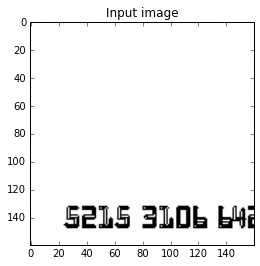

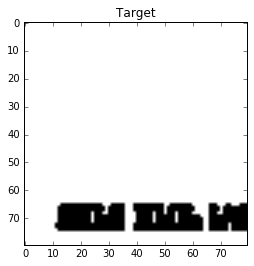

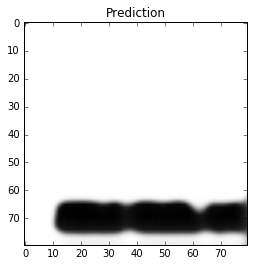

In [14]:
def view_image(i):
    image = images[i][0]
    target = targets[i][0]
    
    plt.figure()
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='bilinear')
    plt.title('Input image')
    plt.figure()
    plt.imshow(target, cmap=plt.cm.gray_r, interpolation='bilinear')
    plt.title('Target')
    
    input_img = np.expand_dims(np.expand_dims(image, axis=0), axis=0)
    prediction = model.predict(input_img)[0, 0]
    plt.figure()
    plt.imshow(prediction, cmap=plt.cm.gray_r, interpolation='bilinear')
    plt.title('Prediction')
    
q = interact(view_image, i=(0, len(images) - 1))

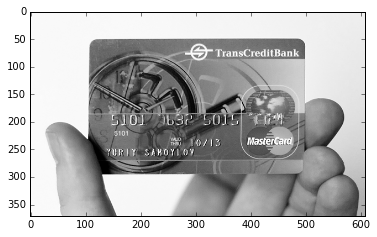

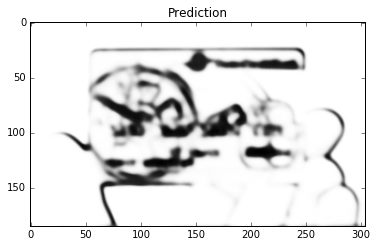

In [23]:
import scipy
import glob
from image import normalize_pixels

test_images_folder = 'test_images'

test_image_files = list(glob.iglob('{}/*.jpg'.format(test_images_folder)))
test_image_files += list(glob.iglob('{}/*.png'.format(test_images_folder)))


def view_image(i):
    
    test_image_file = test_image_files[i] 
    image = normalize_pixels(scipy.ndimage.imread(test_image_file, flatten=True))
    plt.figure()
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='bilinear')
    
    input_img = np.expand_dims(np.expand_dims(image, axis=0), axis=0)
    prediction = model.predict(input_img)[0, 0]
    plt.figure()
    plt.imshow(prediction, cmap=plt.cm.gray_r, interpolation='bilinear')
    plt.title('Prediction')
    
q = interact(view_image, i=(0, len(test_image_files)))

